In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("forestfires.csv", sep=",")

In [3]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


## 1. Generación de Aleatorios

In [84]:
import random

# FUNCIÓN GENERADORA 100 NÚMEROS PSEUDOALEATORIOS PYTHON RANDOM

def random_python(N=100):
    numeros = []
    random.seed(1032022)
    [numeros.append(random.random())for i in range(N)]
    return numeros

In [80]:
# FUNCIÓN GENERADORA 100 NÚMEROS PSEUDOALEATORIOS CUADRADOS MEDIOS

def cuadrados_medios(N,semilla,digitos):
    pseudoaleatorios = []
    xo = semilla
    xn = xo
    for i in range(N):
        xnn = xn ** 2
        txnn = str(xnn).zfill(8)
        tam = len(txnn)
        ui = int(txnn[int(tam/2-digitos/2):int(tam/2+digitos/2)])
        rn = ui / (int('9' * digitos) + 1)
        xn = ui
        pseudoaleatorios.append(rn)
    return pseudoaleatorios

In [81]:
# FUNCIÓN GEERADORA 100 NÚMEROS PSEUDOALEATORIOS CONGRUENCIA LINEAL

def congruencia_lineal(N, a, b, xo, m):
    pseudoaleatorios = []
    xn = xo
    for i in range(N):
        xnn = (a * xn + b) % m
        ui = xnn / m
        xn = xnn
        pseudoaleatorios.append(ui)
    return pseudoaleatorios

In [94]:
# FUNCIÓN GEERADORA 100 NÚMEROS PSEUDOALEATORIOS TAUSWORTH

def tauswoth(r, q, l, N):
    num = N * l
    binarios = []
    for i in range(0,num):
        if(i<q):
            binarios.append(1)
        else: 
            binarios.append((binarios[i-r]+binarios[i-q]) % 2)
    valor_l = l
    grup = int(num/valor_l)
    posicion = 0 
    aux = valor_l
    contador_1 = 0
    pseudoaleatorios = []
    for j in range(0,grup):
        new =binarios[contador_1:aux] 
        a_decimal = 0
        contador_12 = 0
        for k in range(len(new)-1,-1,-1):
            if(new[contador_12]==1): 
                a_decimal = 2**(k) + a_decimal
            contador_12 = contador_12 + 1
        pseudoaleatorios.append(a_decimal / (2**l))
        contador_1 = contador_1 + l
        aux = aux + l
    return pseudoaleatorios

## 2. Autocorrelación

In [17]:
import math

def m_longer(m, i, N):
    m = (N-i)/m - 1
    m = math.trunc(m)
    return m

In [104]:
def Pim(index, m, M, R):
    schmidt = 0
    index =- 1
    for i in range(0, M+1, 1):
        schmidt += R[index + i * m] * R[index + ((i + 1) * m)]
    pim = (schmidt * (1 / (M + 1)) - 0.25)
    return pim

In [56]:
def σPim(M):
    a = 13 * M
    σ = (math.sqrt(a + 7)) / (12 * (M + 1))
    return σ

In [57]:
def Z(Pim, σPim):
    z = Pim / σPim
    return z

In [65]:
def test(z, α):
    if (z >= -α) and (z <= α):
        return True
    else:
        return False

## 3. Resultados Obtenidos

In [95]:
pseudoaleatorios_py = random_python(100)

M = m_longer(5, 0, len(pseudoaleatorios_py))
pim = Pim(0, 5, M, pseudoaleatorios_py)
σ = σPim(M)
z = Z(pim, σ)
t = test(z, 1.96)
out = ("Reprueba la prueba de aleatoriedad", "Aprueba la prueba de aleatoriedad")[t]

print("El algoritmo de random python bajo la semilla de 1032022, " + out + " con el siguiente valor de z")
print("z = " + str(z))

El algoritmo de random python bajo la semilla de 1032022, Aprueba la prueba de aleatoriedad con el siguiente valor de z
z = -1.4367719737137297


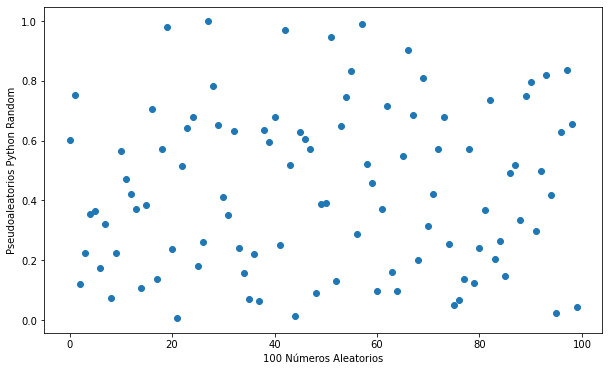

In [96]:
import matplotlib.pyplot as plt

# DIAGRAMA DE DISPERSIÓN

fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(x=range(100), y=pseudoaleatorios_py)
plt.xlabel("100 Números Aleatorios")
plt.ylabel("Pseudoaleatorios Python Random")
plt.show()

In [97]:
pseudoaleatorios_cm = cuadrados_medios(100, 7363423178943, 7)

M = m_longer(5, 0, len(pseudoaleatorios_cm))
pim = Pim(0, 5, M, pseudoaleatorios_cm)
σ = σPim(M)
z = Z(pim, σ)
t = test(z, 1.96)
out = ("Reprueba la prueba de aleatoriedad", "Aprueba la prueba de aleatoriedad")[t]

print("El algoritmo de cuadrados medios bajo la semilla de 7363423178943, " + out + " con el siguiente valor de z")
print("z = " + str(z))

El algoritmo de cuadrados medios bajo la semilla de 7363423178943, Aprueba la prueba de aleatoriedad con el siguiente valor de z
z = -1.7841867562003606


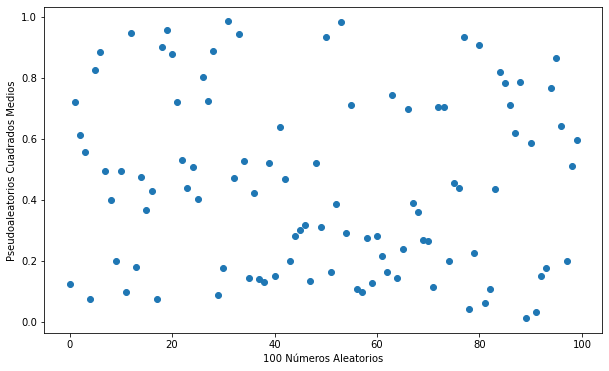

In [98]:
# DIAGRAMA DE DISPERSIÓN

fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(x=range(100), y=pseudoaleatorios_cm)
plt.xlabel("100 Números Aleatorios")
plt.ylabel("Pseudoaleatorios Cuadrados Medios")
plt.show()

In [99]:
pseudoaleatorios_cl = congruencia_lineal(100, 74731897457, 37747318974, 7, 19)

M = m_longer(5, 0, len(pseudoaleatorios_cl))
pim = Pim(0, 5, M, pseudoaleatorios_cl)
σ = σPim(M)
z = Z(pim, σ)
t = test(z, 1.96)
out = ("Reprueba la prueba de aleatoriedad", "Aprueba la prueba de aleatoriedad")[t]

print("El algoritmo de congruencia lineal bajo la semilla de 74731897457 y 37747318974, " + out + " con el siguiente valor de z")
print("z = " + str(z))

El algoritmo de congruencia lineal bajo la semilla de 74731897457 y 37747318974, Aprueba la prueba de aleatoriedad con el siguiente valor de z
z = -0.4150594079418067


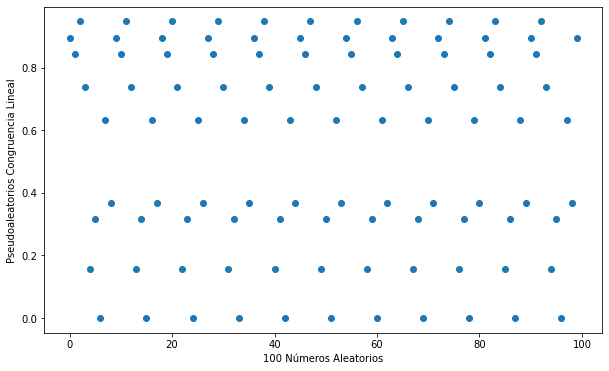

In [100]:
# DIAGRAMA DE DISPERSIÓN

fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(x=range(100), y=pseudoaleatorios_cl)
plt.xlabel("100 Números Aleatorios")
plt.ylabel("Pseudoaleatorios Congruencia Lineal")
plt.show()

In [101]:
pseudoaleatorios_tw = tauswoth(7, 15, 7, 100)

M = m_longer(5, 0, len(pseudoaleatorios_tw))
pim = Pim(0, 5, M, pseudoaleatorios_tw)
σ = σPim(M)
z = Z(pim, σ)
t = test(z, 1.96)
out = ("Reprueba la prueba de aleatoriedad", "Aprueba la prueba de aleatoriedad")[t]

print("El algoritmo de tauswoth bajo los parametros de r = 7, q = 15, l = 7, " + out + " con el siguiente valor de z")
print("z = " + str(z))

El algoritmo de tauswoth bajo los parametros de r = 7, q = 15, l = 7, Aprueba la prueba de aleatoriedad con el siguiente valor de z
z = 0.4011519816687732


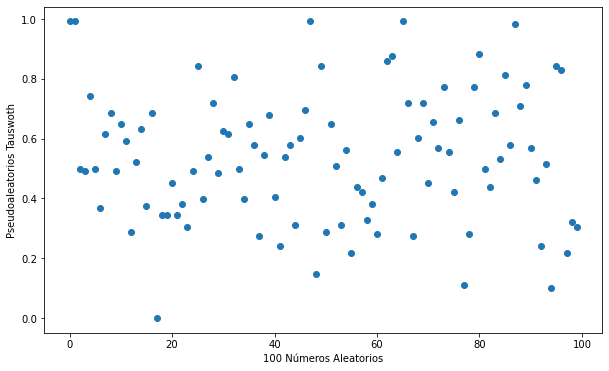

In [103]:
# DIAGRAMA DE DISPERSIÓN

fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(x=range(100), y=pseudoaleatorios_tw)
plt.xlabel("100 Números Aleatorios")
plt.ylabel("Pseudoaleatorios Tauswoth")
plt.show()

## 4. Conclusiones:

### El test de autocorrelación nos permite identificar una de las caracteristicas mas importantes de los números pseudoaleatorios, la independencia entre los distintos valores generados. En este caso en especifico podemos observar que los 4 algoritmos probados con sus respectivas semillas pasan la prueba cuando se tienen en consideración los parametros establecidos en las diapositivas, α=0.05 y Z=1.96.